In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv('2021_OPM_FEVS_PRDF.csv')
df = df.dropna()

In [46]:
df.head()

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
2,152966380283,XX,5.0,5.0,4.0,4.0,3,4,5,4,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
5,195312241136,XX,4.0,3.0,4.0,4.0,4,4,4,3,...,A,B,B,B,A,B,B,A,A,2.076046
6,187815423862,XX,5.0,4.0,4.0,4.0,4,4,4,4,...,B,B,B,B,B,B,A,A,A,1.858874
7,174698178690,XX,1.0,1.0,2.0,1.0,3,1,2,2,...,B,B,B,B,A,B,B,B,C,1.089288


In [47]:
int(df.Q10.mode())

4

In [48]:
for k in range(2,69):
    if 'X' in df.iloc[:,k].values:
        df.iloc[:,k].replace({'X':int(df.iloc[:,k].mode())}, inplace=True)

/tmp/ipykernel_538020/3928364514.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'X' in df.iloc[:,k].values:


In [49]:
df.iloc[:,2:69] = df.iloc[:,2:69].astype(int)

In [50]:
df = df.drop(["RandomID"], axis=1)

In [51]:
df.head()

,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
2,XX,5,5,4,4,3,4,5,4,5,...,B,B,B,B,A,B,A,B,C,1.858874
3,XX,5,5,5,5,5,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
5,XX,4,3,4,4,4,4,4,3,4,...,A,B,B,B,A,B,B,A,A,2.076046
6,XX,5,4,4,4,4,4,4,4,5,...,B,B,B,B,B,B,A,A,A,1.858874
7,XX,1,1,2,1,3,1,2,2,4,...,B,B,B,B,A,B,B,B,C,1.089288


## Computing polychoric correlations and pca using RyStats module

https://github.com/eribean/RyStats

In [52]:
import polychoric
import pca

In [199]:
pol_corr = polychoric.polychoric_correlation_serial(np.array(df.iloc[:,1:9]).transpose(), start_val=1, stop_val=5)

In [200]:
pol_corr

array([[1.        , 0.82483277, 0.73836164, 0.66204081, 0.46878945,
        0.75945302, 0.63188217, 0.60145349],
       [0.82483277, 1.        , 0.74393227, 0.67387062, 0.43695859,
        0.75484325, 0.63559501, 0.61860011],
       [0.73836164, 0.74393227, 1.        , 0.71039536, 0.42018614,
        0.75401238, 0.69215075, 0.53891777],
       [0.66204081, 0.67387062, 0.71039536, 1.        , 0.47218028,
        0.68393647, 0.69947811, 0.55202013],
       [0.46878945, 0.43695859, 0.42018614, 0.47218028, 1.        ,
        0.49632   , 0.42398206, 0.40378386],
       [0.75945302, 0.75484325, 0.75401238, 0.68393647, 0.49632   ,
        1.        , 0.69842855, 0.59839001],
       [0.63188217, 0.63559501, 0.69215075, 0.69947811, 0.42398206,
        0.69842855, 1.        , 0.57329637],
       [0.60145349, 0.61860011, 0.53891777, 0.55202013, 0.40378386,
        0.59839001, 0.57329637, 1.        ]])

<AxesSubplot:>

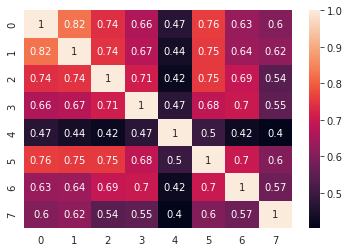

In [201]:
sns.heatmap(pol_corr, annot=True)

In [202]:
princ, eigen, uniq = pca.principal_components_analysis(pol_corr, n_factors=5)

In [203]:
princ

array([[ 0.87819225, -0.09164948,  0.00264293,  0.31841889, -0.01224723],
       [ 0.87957697, -0.14304283, -0.02526162,  0.28879636, -0.06064752],
       [ 0.86613428, -0.1667151 ,  0.21394603,  0.0334363 ,  0.02116515],
       [ 0.8379064 , -0.01697294,  0.17676375, -0.27078472, -0.42127722],
       [ 0.60429613,  0.79106775,  0.05264324,  0.04671371,  0.02409725],
       [ 0.88587757, -0.04068307,  0.06980253,  0.08335535,  0.21202778],
       [ 0.82284133, -0.08742114,  0.09165178, -0.42415647,  0.27618455],
       [ 0.74225499, -0.0069286 , -0.65015718, -0.11960551, -0.04161642]])

In [204]:
eigen

array([5.3751162 , 0.69207664, 0.51641157, 0.46258075, 0.30529687])

In [205]:
eigen.sum()/len(uniq)

0.9189352536020965

[Text(0.5, 0, 'Principal Components'),
 Text(0, 0.5, 'Percentage explained variances')]

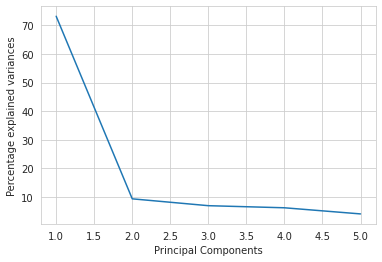

In [206]:
elb1 = sns.lineplot(x=list(range(1,6)), y=100*eigen/eigen.sum())
elb1.set(xlabel ="Principal Components", ylabel = "Percentage explained variances")

In [207]:
def get_pca(from_quest, up_to_quest, number_comp):
    num_vars = up_to_quest + 1 - from_quest
    pol_corr = polychoric.polychoric_correlation_serial(
                                                np.array(df.iloc[:,from_quest:up_to_quest+1]).transpose(), 
                                                start_val=1, 
                                                stop_val=5)
    
    princ, eigen, uniq = pca.principal_components_analysis(pol_corr, n_factors=num_vars)
    elbow_graph = sns.lineplot(x=list(range(1, num_vars+1)), y=100*eigen/eigen.sum())
    elbow_graph.set(xlabel ="Principal Components", ylabel = "Percentage explained variances")
    print(princ[:,:number_comp])

[[ 0.87819225 -0.09164948]
 [ 0.87957697 -0.14304283]
 [ 0.86613428 -0.1667151 ]
 [ 0.8379064  -0.01697294]
 [ 0.60429613  0.79106775]
 [ 0.88587757 -0.04068307]
 [ 0.82284133 -0.08742114]
 [ 0.74225499 -0.0069286 ]]


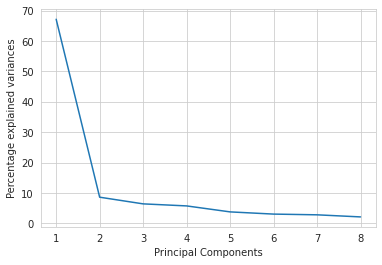

In [208]:
# pca for work experience: Q1 - Q8
get_pca(1,8,2)

[[ 0.78325419 -0.03105635]
 [ 0.70488859  0.09508904]
 [ 0.13900583 -0.32572042]
 [ 0.73072138  0.28975819]
 [ 0.77825863  0.05255656]
 [ 0.82340032 -0.34083464]
 [ 0.87857816 -0.31660607]
 [ 0.86064304 -0.35230785]
 [ 0.82893955 -0.34106794]
 [ 0.85724507 -0.28017408]
 [ 0.84631826 -0.31480418]
 [ 0.75793663  0.40312723]
 [ 0.62598452  0.44123356]
 [ 0.77093028  0.28030514]
 [ 0.75663086  0.41147185]
 [ 0.65411997  0.44656394]]


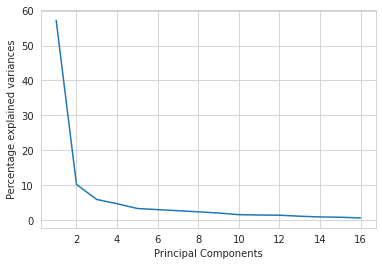

In [209]:
# pca for work unit: Q9 - Q24
get_pca(9,24,2)

[[-0.82861108  0.35606218]
 [-0.79489957  0.32666103]
 [-0.86132203  0.26763702]
 [-0.86241218  0.40724604]
 [-0.85977205  0.41477074]
 [-0.87810022  0.38528067]
 [-0.84844646  0.36263599]
 [-0.80054941 -0.4748891 ]
 [-0.80138488 -0.43397196]
 [-0.80942099 -0.35400957]
 [-0.8079663  -0.33715302]
 [-0.75730227 -0.28223277]
 [-0.78762842 -0.47105191]
 [-0.75952051 -0.35204412]]


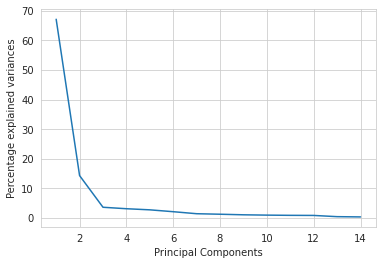

In [210]:
# pca for supervisor relationship: Q25 - Q38
get_pca(25,38,2)

[[-0.88996086  0.22545741]
 [-0.87204901  0.24716494]
 [-0.8746278   0.00782007]
 [-0.91209535  0.01820798]
 [-0.66971263 -0.72717486]
 [-0.92469929  0.05121981]]


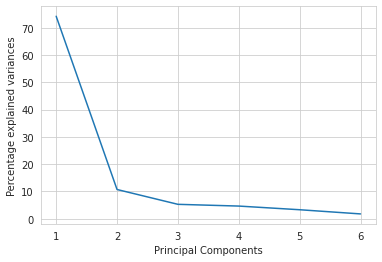

In [211]:
# pca for work satisfaction: Q39 - Q44
get_pca(39,44,2)

In [212]:
for i,key in enumerate(df.keys()):
    print(i, key)

0 agency
1 Q1
2 Q2
3 Q3
4 Q4
5 Q5
6 Q6
7 Q7
8 Q8
9 Q9
10 Q10
11 Q11
12 Q12
13 Q13
14 Q14
15 Q15
16 Q16
17 Q17
18 Q18
19 Q19
20 Q20
21 Q21
22 Q22
23 Q23
24 Q24
25 Q25
26 Q26
27 Q27
28 Q28
29 Q29
30 Q30
31 Q31
32 Q32
33 Q33
34 Q34
35 Q35
36 Q36
37 Q37
38 Q38
39 Q39
40 Q40
41 Q41
42 Q42
43 Q43
44 Q44
45 Q45
46 Q46
47 Q47_01
48 Q47_02
49 Q47_03
50 Q47_04
51 Q47_05
52 Q47_06
53 Q47_07
54 Q47_08
55 Q47_09
56 Q47_10
57 Q47_11
58 Q48
59 Q49
60 Q50
61 Q51
62 Q52
63 Q53
64 Q54
65 Q55
66 Q56
67 Q57
68 DRNO
69 DHISP
70 DDIS
71 DAGEGRP
72 DSUPER
73 DFEDTEN
74 DSEX
75 DMIL
76 DLEAVING
77 POSTWT
